In [ ]:
import pandas as pd

# Load the dataset
file_path = '/mnt/Custom_CNN_Features.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])

Missing Values: Series([], dtype: int64)


In [ ]:
class_balance = data['Class Label'].value_counts(normalize=True)
print("Class Balance:")
print(class_balance)

Class Balance:
Class Label
1    0.502306
0    0.324316
2    0.173378
Name: proportion, dtype: float64


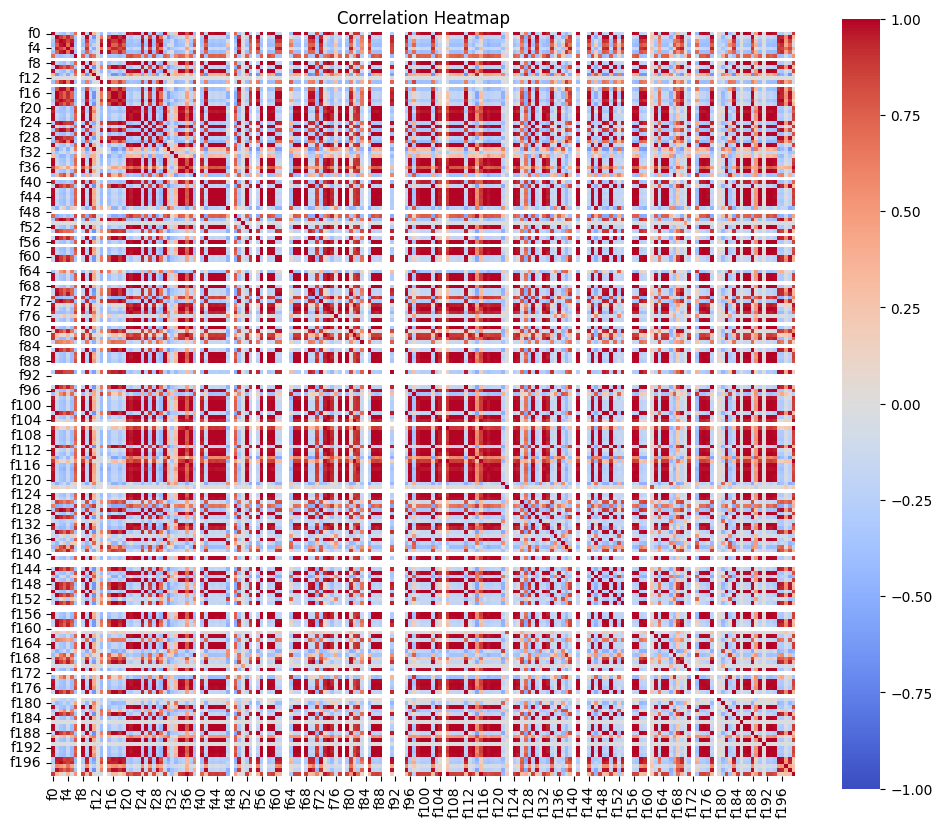

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.drop(columns=["Filename", "Class Label"])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, cbar=True, vmax=1, vmin=-1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
matrix_rank = np.linalg.matrix_rank(numeric_data)
print("Matrix Rank:", matrix_rank)

Matrix Rank: 174


In [ ]:
feature_ranges = numeric_data.agg(['min', 'max'])
print("Feature Ranges:")
print(feature_ranges)

Feature Ranges:
            f0          f1          f2          f3          f4          f5  \
min    0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max  781.78949  459.207794  536.879639  760.753845  202.598496  587.289551   

            f6  f7           f8          f9  ...         f190      f191  \
min    0.00000   0      0.00000    0.000000  ...     0.000000  0.000000   
max  217.98201   0  10129.19336  260.783539  ...  7535.423828  0.341233   

            f192         f193         f194        f195        f196       f197  \
min     0.000000     0.000000     0.000000    0.000000    0.000000   0.000000   
max  5972.883789  6563.629883  5749.376465  750.316284  571.680176  31.048813   

           f198        f199  
min    0.000000     0.00000  
max  505.643402  1758.73584  

[2 rows x 200 columns]


In [ ]:
normalized_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())
print("Normalized Data Sample:")
print(normalized_data.head())

Normalized Data Sample:
         f0   f1   f2   f3   f4   f5        f6  f7        f8   f9  ...  \
0  0.064669  0.0  0.0  0.0  0.0  0.0  0.000000 NaN  0.040959  0.0  ...   
1  0.160217  0.0  0.0  0.0  0.0  0.0  0.224739 NaN  0.171410  0.0  ...   
2  0.064161  0.0  0.0  0.0  0.0  0.0  0.000000 NaN  0.042968  0.0  ...   
3  0.081506  0.0  0.0  0.0  0.0  0.0  0.000000 NaN  0.058093  0.0  ...   
4  0.082483  0.0  0.0  0.0  0.0  0.0  0.171430 NaN  0.106704  0.0  ...   

       f190  f191      f192      f193      f194  f195  f196  f197  f198  \
0  0.041971   0.0  0.040111  0.042329  0.035791   0.0   0.0   0.0   0.0   
1  0.174819   0.0  0.167436  0.170408  0.179214   0.0   0.0   0.0   0.0   
2  0.043856   0.0  0.042172  0.043888  0.038420   0.0   0.0   0.0   0.0   
3  0.058768   0.0  0.057785  0.059281  0.052951   0.0   0.0   0.0   0.0   
4  0.110830   0.0  0.108765  0.105597  0.120124   0.0   0.0   0.0   0.0   

       f199  
0  0.051991  
1  0.169146  
2  0.053331  
3  0.066742  
4  0.09092

In [ ]:
normalized_data['Class Label'] = data['Class Label']
normalized_data.to_csv('/mnt/Normalized_Custom_CNN_Features.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
X = normalized_data.drop(columns=['Class Label'])
y = normalized_data['Class Label']

# Handle missing values: Impute with column mean
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Create imputer object
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)      # Transform test data using fitted imputer


results = []
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Get predicted probabilities for AUROC calculation
    # Use predict_proba directly if available, otherwise skip AUROC calculation
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test)  # Get probabilities for all classes
        # For binary classification, select the positive class probabilities if needed
        # If your target variable has more than two classes, modify accordingly
        if y_prob.shape[1] == 2:
            y_prob = y_prob[:, 1]
    else:
        y_prob = None

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate AUROC if probabilities are available
    auroc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'

    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUROC": auroc
    })

# Display results
results_df = pd.DataFrame(results)
print("\nClassification Results:")
print(results_df)



Classification Results:
      Classifier  Accuracy  Precision    Recall  F1-Score     AUROC
0            kNN  0.934889   0.937124  0.934889  0.934978  0.970237
1  Decision Tree  0.921376   0.921818  0.921376  0.921457  0.938055
2            SVM  0.931204   0.934461  0.931204  0.931355  0.978818
3  Random Forest  0.937346   0.939673  0.937346  0.937399  0.983016
4    Naive Bayes  0.922604   0.923966  0.922604  0.922782  0.965383


In [ ]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


kNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       288
           1       0.90      0.97      0.93       376
           2       0.99      0.93      0.96       150

    accuracy                           0.93       814
   macro avg       0.95      0.93      0.94       814
weighted avg       0.94      0.93      0.93       814


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       288
           1       0.91      0.93      0.92       376
           2       0.96      0.92      0.94       150

    accuracy                           0.92       814
   macro avg       0.93      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.92       288
           1       0.89      0.97  

In [ ]:
# Step 14: Compare Train and Test Metrics
fit_analysis = []
for name, clf in classifiers.items():
    # Train set evaluation
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Test set evaluation (already computed above)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Add to analysis
    fit_analysis.append({
        "Classifier": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1-Score": train_f1,
        "Test F1-Score": test_f1,
    })

# Display fit analysis
fit_analysis_df = pd.DataFrame(fit_analysis)
print("\nFit Analysis Results:")
print(fit_analysis_df)


# Regular Fit Models: kNN, SVM, Naive Bayes.
# Overfitting Models: Decision Tree, Random Forest.


Fit Analysis Results:
      Classifier  Train Accuracy  Test Accuracy  Train Precision  \
0            kNN        0.943419       0.934889         0.943975   
1  Decision Tree        1.000000       0.921376         1.000000   
2            SVM        0.933989       0.931204         0.935948   
3  Random Forest        1.000000       0.937346         1.000000   
4    Naive Bayes        0.918409       0.922604         0.920479   

   Test Precision  Train Recall  Test Recall  Train F1-Score  Test F1-Score  
0        0.937124      0.943419     0.934889        0.943355       0.934978  
1        0.921818      1.000000     0.921376        1.000000       0.921457  
2        0.934461      0.933989     0.931204        0.933774       0.931355  
3        0.939673      1.000000     0.937346        1.000000       0.937399  
4        0.923966      0.918409     0.922604        0.918482       0.922782  


In [ ]:
import time

timing_results = []
for name, clf in classifiers.items():
    # Measure training time
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = clf.predict(X_test)
    prediction_time = time.time() - start_time

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    timing_results.append({
        "Classifier": name,
        "Train Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    })

# Convert to DataFrame for better visualization
timing_results_df = pd.DataFrame(timing_results)

# Display the timing and performance results
print("\nTiming and Performance Results:")
print(timing_results_df)


Timing and Performance Results:
      Classifier  Train Time (s)  Prediction Time (s)  Accuracy  Precision  \
0            kNN        0.006143             0.087330  0.934889   0.937124   
1  Decision Tree        0.246998             0.000837  0.921376   0.921818   
2            SVM        0.818644             0.083057  0.931204   0.934461   
3  Random Forest        1.757255             0.022112  0.937346   0.939673   
4    Naive Bayes        0.009782             0.003042  0.922604   0.923966   

     Recall  F1-Score  
0  0.934889  0.934978  
1  0.921376  0.921457  
2  0.931204  0.931355  
3  0.937346  0.937399  
4  0.922604  0.922782  
